In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from keras.metrics import MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns

In [6]:
train_data = pd.read_csv("electricity_demand.csv")
test_data = pd.read_csv("dataset_for_prediction.csv")

In [7]:
train_data['date'] = train_data['date'].astype('datetime64[ns]')
test_data['date'] = test_data['date'].astype('datetime64[ns]')

In [8]:
train_data

,date,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,13.3,5.186521,0.000000,0.0,N,Y
1,2015-01-02,129606.010,33.138988,15.4,6.228965,0.880597,0.0,N,N
2,2015-01-03,142300.540,34.564855,20.0,6.180615,1.011321,0.0,N,N
3,2015-01-04,104330.715,25.005560,16.3,4.626013,1.051587,4.2,N,N
4,2015-01-05,118132.200,26.724176,15.0,4.690416,0.820847,0.0,N,N
...,...,...,...,...,...,...,...,...,...
2246,2021-02-24,108577.110,25.840417,11.6,4.494441,0.948498,0.0,Y,N
2247,2021-02-25,107456.345,21.205833,10.7,4.929503,1.232804,0.0,Y,N
2248,2021-02-26,107807.000,25.796250,12.3,4.438468,1.203822,0.4,Y,N
2249,2021-02-27,103417.660,29.897083,11.1,4.312772,1.330508,0.0,N,N


In [9]:
test_data.drop(columns=['demand'], inplace = True)

In [10]:
train_data = train_data[['date', 'RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday', 'demand']]   

In [11]:
train_data.rename({'date':'ds', 'demand':'y'}, inplace = True, axis = 'columns')
test_data.rename({'date':'ds'}, inplace = True, axis = 'columns')

In [12]:
train_data['school_day'] = train_data['school_day'].map({'Y': 1, 'N': 0})
train_data['holiday'] = train_data['holiday'].map({'Y': 1, 'N': 0})

test_data['school_day'] = test_data['school_day'].map({'Y': 1, 'N': 0})
test_data['holiday'] = test_data['holiday'].map({'Y': 1, 'N': 0})

In [13]:
ms_x = MinMaxScaler()

In [14]:
train_data[['RRP', 'min_temperature', 'max_temperature','solar_exposure', 'rainfall']] = ms_x.fit_transform(train_data[['RRP', 'min_temperature', 'max_temperature','solar_exposure', 'rainfall']])

In [15]:
test_data[['RRP', 'min_temperature', 'max_temperature','solar_exposure', 'rainfall']] = ms_x.transform(test_data[['RRP', 'min_temperature', 'max_temperature','solar_exposure', 'rainfall']])

In [17]:
prophet_ = Prophet(interval_width=0.95, seasonality_mode='additive', n_changepoints=20, seasonality_prior_scale=10)

In [18]:
prophet_.add_regressor('min_temperature', standardize=False)
prophet_.add_regressor('max_temperature', standardize=False)
prophet_.add_regressor('solar_exposure', standardize=False)
prophet_.add_regressor('rainfall', standardize=False)
prophet_.add_regressor('RRP', standardize=False)
prophet_.add_regressor('school_day', standardize=False)
prophet_.add_regressor('holiday', standardize=False)

In [19]:
#Training the Multivariate model
prophet_.fit(train_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
#Predict for the test set
future = prophet_.predict(test_data)
predicted_data = future['yhat']

In [32]:
predicted_data = predicted_data

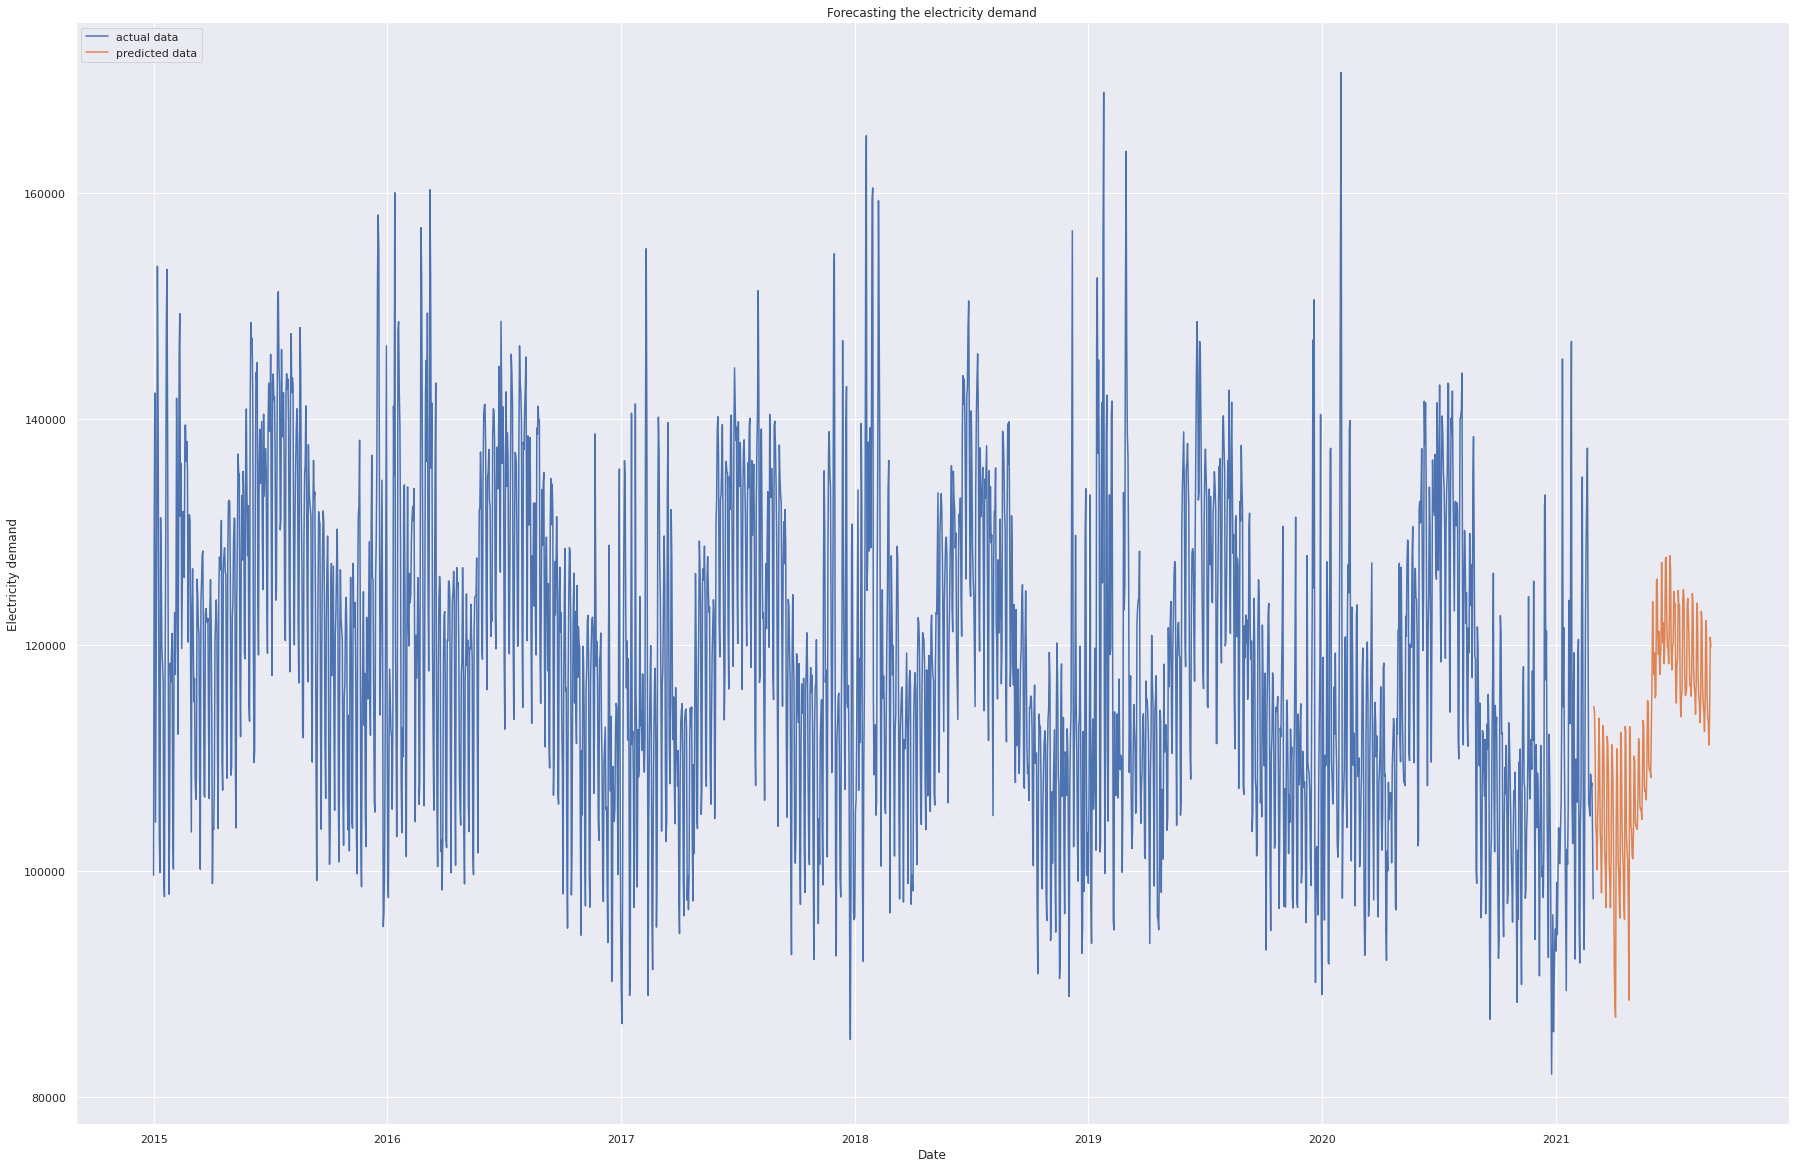

In [40]:
plt.plot(train_data.ds, train_data.y, label = 'actual data')
plt.plot(test_data.ds, predicted_data, label = 'predicted data')
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Electricity demand")
plt.title("Forecasting the electricity demand")
sns.set(rc={'figure.figsize':(30.7,20.27)})

In [42]:
predicted_demand = pd.DataFrame(predicted_data)

In [43]:
predicted_demand.to_csv("predicted_demand.csv")